<a href="https://colab.research.google.com/github/coderhetal/MNIST-Handwritten-digits-classification/blob/main/MNIST__CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN MODEL**



CONVOLUTION NEURAL NETWORK ::


# Importing the libraries :

In [7]:
import torch
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets # Has standard datasets we can import in a nice and easy way
import torchvision.transforms as transforms # Transformations we can perform on our dataset

from tqdm import tqdm  # For nice progress bar!



# Creating data loader



 DataLoader class provides an iterator over the dataset, enabling efficient batch processing. It takes the train_dataset as the input dataset, sets the batch_size to 64, and shuffles the data during each epoch by setting shuffle=True.

In [8]:
#   Load Data
batch_size=64
train_dataset = datasets.MNIST(
    root="dataset/", train=True, transform=transforms.ToTensor(), download=True
)
test_dataset = datasets.MNIST(
    root="dataset/", train=False, transform=transforms.ToTensor(), download=True
)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


# Model

A simple neural network architecture with one hidden layer.

In [17]:
from tqdm import tqdm  # For nice progress bar!
#kernel here is the filter
# [(n+2p-f/s) +1]
# Simple CNN
class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=16,
            kernel_size=(3,3),
            stride=(1,1),
            padding=(1,1),
        )
        # The output of this convolution is set to 16 channels which means it will extract 16 feature maps using 16 kernels.

        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        # 16 x 14 x 14.
        self.conv2 = nn.Conv2d(
            in_channels=16,
            out_channels=24,
            kernel_size=(3,3),
            stride=(1,1),
            padding=(1,1),
        )
        # 64 x 14 x 14.
        # The output of this convolution is set to 24 channels which means it will extract 24 feature maps using 24 kernels.

        self.fc1 = nn.Linear(24 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
         # 16 x 28 x 28.-->output dimension
        x = self.pool(x)
         # 16 x 14 x 14.-->output dimension
        x = F.relu(self.conv2(x))
         # 24 x 14 x 14.-->output dimension
        x = self.pool(x)
         # 24 x 7 x 7.-->output dimension
        x = x.reshape(x.shape[0], -1)
        #print(x.shape())
        #1176,1
        x = self.fc1(x)
        return x



In [10]:
# Hyperparameters
in_channels = 1
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 5

# Setting device

In [18]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CNN()

# Initialize network
model = CNN().to(device)


## Loss and optimizer

In [19]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
costs=[]
acc_list=[]
total_step=len(train_loader)

print(f'Batch size  {batch_size}')
total_step=len(train_loader)
print(f'total train data batches  {total_step}')
m=batch_size*total_step
print(f'total training data  {m}')
total_test_batches=len(test_loader)
print(f'total test data batches  {total_test_batches}')
t=batch_size*total_test_batches
print(f'total test data   {t}')
print(f'total dataset size  {t+m}')

Batch size  64
total train data batches  938
total training data  60032
total test data batches  157
total test data   10048
total dataset size  70080


# Training and finding accuracy for training data

Training loop for a neural network, where the model is trained using mini-batches of data, computing gradients, and updating the model parameters iteratively.

The loss and accuracy values are tracked for monitoring the training progress.

In [21]:
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}")
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)


        # forward propagation
        scores = model(data)
        loss = criterion(scores, targets)
        costs.append(loss.item())

        # zero previous gradients
        optimizer.zero_grad()

        # back-propagation
        loss.backward()

        # gradient descent or adam step
        optimizer.step()

        # tracking accuracy
        total=targets.size(0)
        _, predictions = torch.max(scores.data,1)
        num_correct = (predictions == targets).sum().item()
        acc_list.append(num_correct/total)



        if (batch_idx + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, batch_idx + 1, total_step, loss.item(),
                          (num_correct / total) * 100))

Epoch: 1


 11%|█         | 103/938 [00:03<00:30, 27.05it/s]

Epoch [1/5], Step [100/938], Loss: 0.3260, Accuracy: 92.19%


 22%|██▏       | 203/938 [00:07<00:24, 30.32it/s]

Epoch [1/5], Step [200/938], Loss: 0.3586, Accuracy: 92.19%


 33%|███▎      | 305/938 [00:12<00:23, 26.64it/s]

Epoch [1/5], Step [300/938], Loss: 0.2043, Accuracy: 92.19%


 43%|████▎     | 405/938 [00:15<00:20, 26.13it/s]

Epoch [1/5], Step [400/938], Loss: 0.1153, Accuracy: 96.88%


 53%|█████▎    | 499/938 [00:19<00:14, 30.16it/s]

Epoch [1/5], Step [500/938], Loss: 0.2599, Accuracy: 95.31%


 64%|██████▍   | 603/938 [00:24<00:14, 23.62it/s]

Epoch [1/5], Step [600/938], Loss: 0.1789, Accuracy: 96.88%


 75%|███████▌  | 704/938 [00:27<00:07, 30.13it/s]

Epoch [1/5], Step [700/938], Loss: 0.0646, Accuracy: 98.44%


 86%|████████▌ | 804/938 [00:30<00:04, 30.50it/s]

Epoch [1/5], Step [800/938], Loss: 0.1194, Accuracy: 95.31%


 96%|█████████▋| 903/938 [00:34<00:01, 25.70it/s]

Epoch [1/5], Step [900/938], Loss: 0.1239, Accuracy: 96.88%


100%|██████████| 938/938 [00:35<00:00, 26.12it/s]


Epoch: 2


 11%|█         | 105/938 [00:03<00:30, 27.23it/s]

Epoch [2/5], Step [100/938], Loss: 0.0930, Accuracy: 96.88%


 22%|██▏       | 203/938 [00:07<00:26, 28.19it/s]

Epoch [2/5], Step [200/938], Loss: 0.1109, Accuracy: 93.75%


 32%|███▏      | 303/938 [00:11<00:30, 21.09it/s]

Epoch [2/5], Step [300/938], Loss: 0.0747, Accuracy: 96.88%


 43%|████▎     | 405/938 [00:15<00:18, 28.07it/s]

Epoch [2/5], Step [400/938], Loss: 0.0799, Accuracy: 98.44%


 54%|█████▎    | 504/938 [00:18<00:14, 30.27it/s]

Epoch [2/5], Step [500/938], Loss: 0.0554, Accuracy: 98.44%


 65%|██████▍   | 606/938 [00:22<00:10, 30.22it/s]

Epoch [2/5], Step [600/938], Loss: 0.0140, Accuracy: 100.00%


 75%|███████▌  | 704/938 [00:26<00:09, 24.62it/s]

Epoch [2/5], Step [700/938], Loss: 0.1218, Accuracy: 96.88%


 86%|████████▌ | 805/938 [00:29<00:04, 30.23it/s]

Epoch [2/5], Step [800/938], Loss: 0.0558, Accuracy: 98.44%


 96%|█████████▋| 903/938 [00:33<00:01, 26.94it/s]

Epoch [2/5], Step [900/938], Loss: 0.0796, Accuracy: 95.31%


100%|██████████| 938/938 [00:34<00:00, 26.85it/s]


Epoch: 3


 11%|█         | 103/938 [00:04<00:34, 24.43it/s]

Epoch [3/5], Step [100/938], Loss: 0.0239, Accuracy: 98.44%


 22%|██▏       | 205/938 [00:08<00:24, 29.39it/s]

Epoch [3/5], Step [200/938], Loss: 0.0095, Accuracy: 100.00%


 33%|███▎      | 305/938 [00:11<00:21, 29.87it/s]

Epoch [3/5], Step [300/938], Loss: 0.0358, Accuracy: 100.00%


 43%|████▎     | 402/938 [00:15<00:25, 20.81it/s]

Epoch [3/5], Step [400/938], Loss: 0.0598, Accuracy: 98.44%


 54%|█████▎    | 503/938 [00:19<00:15, 27.59it/s]

Epoch [3/5], Step [500/938], Loss: 0.0587, Accuracy: 96.88%


 64%|██████▍   | 604/938 [00:22<00:11, 27.95it/s]

Epoch [3/5], Step [600/938], Loss: 0.1020, Accuracy: 98.44%


 75%|███████▌  | 705/938 [00:25<00:07, 30.07it/s]

Epoch [3/5], Step [700/938], Loss: 0.0340, Accuracy: 98.44%


 86%|████████▌ | 804/938 [00:30<00:04, 27.15it/s]

Epoch [3/5], Step [800/938], Loss: 0.0875, Accuracy: 96.88%


 96%|█████████▋| 903/938 [00:33<00:01, 28.43it/s]

Epoch [3/5], Step [900/938], Loss: 0.0220, Accuracy: 100.00%


100%|██████████| 938/938 [00:35<00:00, 26.74it/s]


Epoch: 4


 11%|█         | 103/938 [00:03<00:27, 30.48it/s]

Epoch [4/5], Step [100/938], Loss: 0.0470, Accuracy: 98.44%


 22%|██▏       | 202/938 [00:07<00:31, 23.46it/s]

Epoch [4/5], Step [200/938], Loss: 0.0353, Accuracy: 98.44%


 33%|███▎      | 305/938 [00:11<00:20, 30.93it/s]

Epoch [4/5], Step [300/938], Loss: 0.0139, Accuracy: 100.00%


 43%|████▎     | 404/938 [00:14<00:19, 27.48it/s]

Epoch [4/5], Step [400/938], Loss: 0.0268, Accuracy: 98.44%


 53%|█████▎    | 501/938 [00:18<00:22, 19.80it/s]

Epoch [4/5], Step [500/938], Loss: 0.0122, Accuracy: 100.00%


 65%|██████▍   | 606/938 [00:22<00:10, 30.80it/s]

Epoch [4/5], Step [600/938], Loss: 0.0167, Accuracy: 98.44%


 75%|███████▌  | 705/938 [00:25<00:07, 29.94it/s]

Epoch [4/5], Step [700/938], Loss: 0.0326, Accuracy: 98.44%


 86%|████████▌ | 805/938 [00:29<00:04, 30.33it/s]

Epoch [4/5], Step [800/938], Loss: 0.0128, Accuracy: 100.00%


 96%|█████████▋| 905/938 [00:33<00:01, 27.45it/s]

Epoch [4/5], Step [900/938], Loss: 0.0444, Accuracy: 98.44%


100%|██████████| 938/938 [00:34<00:00, 27.20it/s]


Epoch: 5


 11%|█         | 102/938 [00:03<00:27, 30.66it/s]

Epoch [5/5], Step [100/938], Loss: 0.0488, Accuracy: 96.88%


 22%|██▏       | 205/938 [00:06<00:26, 27.83it/s]

Epoch [5/5], Step [200/938], Loss: 0.0388, Accuracy: 98.44%


 32%|███▏      | 303/938 [00:11<00:31, 20.39it/s]

Epoch [5/5], Step [300/938], Loss: 0.0136, Accuracy: 100.00%


 43%|████▎     | 405/938 [00:14<00:19, 27.20it/s]

Epoch [5/5], Step [400/938], Loss: 0.0124, Accuracy: 100.00%


 54%|█████▎    | 504/938 [00:18<00:14, 30.70it/s]

Epoch [5/5], Step [500/938], Loss: 0.0187, Accuracy: 100.00%


 64%|██████▍   | 602/938 [00:21<00:14, 22.97it/s]

Epoch [5/5], Step [600/938], Loss: 0.0166, Accuracy: 100.00%


 75%|███████▌  | 705/938 [00:25<00:08, 26.55it/s]

Epoch [5/5], Step [700/938], Loss: 0.1314, Accuracy: 93.75%


 86%|████████▌ | 802/938 [00:28<00:04, 30.44it/s]

Epoch [5/5], Step [800/938], Loss: 0.0310, Accuracy: 98.44%


 96%|█████████▋| 905/938 [00:32<00:01, 30.31it/s]

Epoch [5/5], Step [900/938], Loss: 0.0343, Accuracy: 98.44%


100%|██████████| 938/938 [00:33<00:00, 28.05it/s]


In [22]:
import matplotlib.pyplot as plt

# Plotting the loss and accuracy for training data

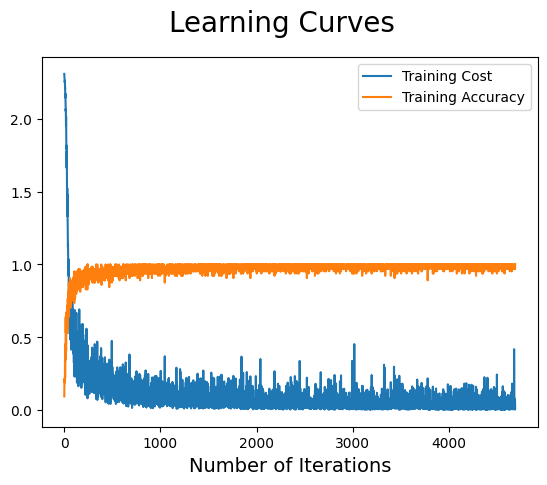

In [23]:
fig = plt.figure()
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.plot(costs, label = 'Training Cost')
plt.plot(acc_list, label = 'Training Accuracy')
plt.legend()
plt.savefig('CNN.png')

In [24]:
import numpy as np

# Accuracy for test data :

In [25]:
model.eval()
for i, (images, targets) in enumerate(test_loader):
    images = images.to(device=device)
    targets= targets.to(device=device)
    #images =  images.reshape( images.shape[0], -1)
    outputs = model(images)
    loss = criterion(outputs, targets)
    costs.append(loss.item())
    total = targets.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted ==targets).sum().item()
    acc_list.append(correct / total)
acc = np.mean(np.array(acc_list))
print("Accuracy over Test set is : ",100*acc)

Accuracy over Test set is :  96.93495976892923
